In [1]:
import pandas as pd
import sys
sys.path.append('./eval-algos/S7/models/')

from onchain_builders import OnchainBuildersCalculator, SimulationConfig, load_config, load_data
from utils.allocator import AllocationConfig, allocate_with_constraints

In [2]:
## Onchain Builders

In [3]:
ds, sim_cfg = load_config('eval-algos/S7/weights/onchain_builders_testing.yaml')
df_data = load_data(ds)

sim_cfg.metric_variants.update({'Adoption': 1.0, 'Growth': 0, 'Retention': 0})
calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

In [4]:
results = analysis['aggregated_project_scores']
scores = results['project_score'] / results['project_score'].sum()

In [5]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
rewards = allocate_with_constraints(scores, alloc)


=== Final Project Allocations ===
project_id                                    project_name       display_name      
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=  uniswap            Uniswap               29314.59
2rDMrpL2LxAp8HdLsctM08faEhDFO6b_OJT0yXJhV9I=  aerodrome-finance  Aerodrome Finance     25457.23
9fdHUXUwgPfemopW3xPuCoLOk5tw7-KQXFgv8HVYtUI=  virtual-protocol   Virtuals Protocol     25077.16
NXrQCspmyubeAyhKPHl5gz8K7zkYOq7G3cSCPP5e31s=  layer3xyz          Layer3                15486.53
I1ULrUY9t789vj4akEP3lLgB9hmC1Unfg7875NEdWL0=  lifinance          LI.FI                 15250.33
PZA75rAKiN4P9poFNpkZYK-yrF1r3WgpEHmbvwPjbXk=  zora               Zora                  15235.93
EhPGap_lKavTMqT2DUdCSDKsQaAiG99v0Rq__pINhMM=  1-inch             1Inch                 14690.95
89Tit1JWeJvJFw5pp7BjqTlEOvLXRQIw7tgZUI1_pj4=  optimism           Optimism              13688.63
w7zsvZGUnkAgUKialQdqZQdKNtHmkaHWxBbfKy8Id98=  reservoirprotocol  Reservoir Protocol    13299.09
EBGuilPthpdMOlNWY

<Axes: >

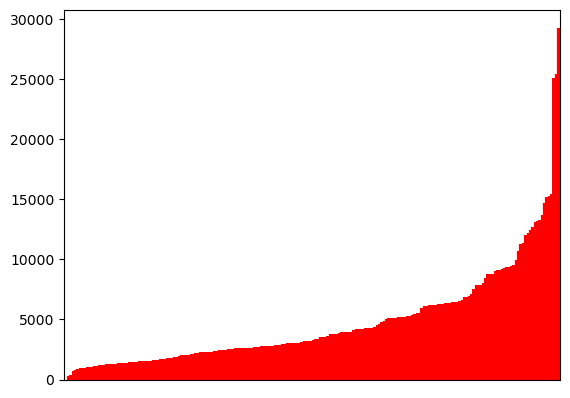

In [6]:
rewards.sort_values().plot(kind='bar', xticks=[], xlabel='', color='red', width=1)

In [7]:
## Devtooling

In [8]:
from devtooling_pagerank import DevtoolingCalculator, SimulationConfig, load_config, load_data

In [9]:
ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_pagerank.yaml')
dfs = load_data(ds)

calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*dfs)

In [10]:
results = analysis['pagerank_scores']
scores = results['pagerank_score'] / results['pagerank_score'].sum()

In [11]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
rewards = allocate_with_constraints(scores, alloc)


=== Final Project Allocations ===
0     50000.00
7     50000.00
44    50000.00
36    50000.00
30    50000.00
39    50000.00
8     50000.00
1     50000.00
6     50000.00
2     50000.00
5     50000.00
13    37955.40
12    27721.34
18    25638.81
23    22636.70
10    21203.71
3     19443.29
17    16947.09
9     16352.57
14    15691.89
Name: pagerank_score, dtype: float64

=== Bottom 10 Projects with Rewards ===
72    217.61
71    254.91
68    294.00
67    317.29
56    382.04
79    386.44
54    457.09
77    632.78
53    839.43
37    965.37
Name: pagerank_score, dtype: float64

Number of projects below minimum (200): 1

Total Budget Allocated: 1,000,000 / 1,000,000


<Axes: >

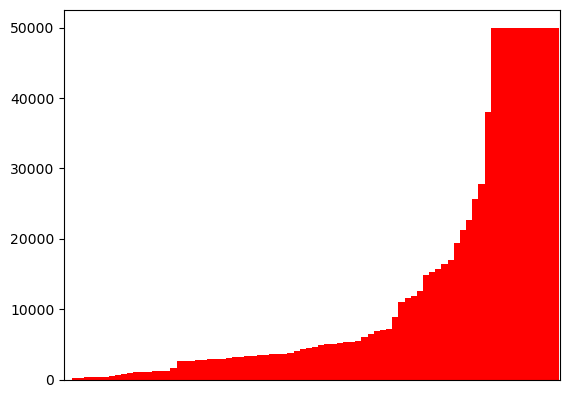

In [12]:
rewards.sort_values().plot(kind='bar', xticks=[], color='red', width=1)